In [14]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [15]:

import pandas as pd
import unicodedata

# 📂 Carregar a planilha
file_path = "SWs.xlsx"  # Substitua pelo caminho correto
df = pd.read_excel(file_path, engine="openpyxl")

# 🔤 Função para remover acentos e espaços extras
def limpar_texto(texto):
    if isinstance(texto, str):  # Verifica se é texto antes de processar
        texto = ''.join(
            c for c in unicodedata.normalize('NFD', texto)
            if unicodedata.category(c) != 'Mn'
        )
        texto = texto.strip()  # Remove espaços extras no início e no fim
        texto = ' '.join(texto.split())  # Substitui múltiplos espaços internos por um único
        return texto
    return texto  # Retorna valores inalterados se não for string

# 🔄 Aplicar a função apenas em colunas de texto (object)
df = df.apply(lambda col: col.map(limpar_texto) if col.dtypes == "object" else col)

# 💾 Salvar a planilha sem acentos e espaços extras
df.to_excel("dados_limpos.xlsx", index=False, engine="openpyxl")

print("✅ Planilha salva sem acentos e sem espaços extras: 'dados_limpos.xlsx'")




✅ Planilha salva sem acentos e sem espaços extras: 'dados_limpos.xlsx'


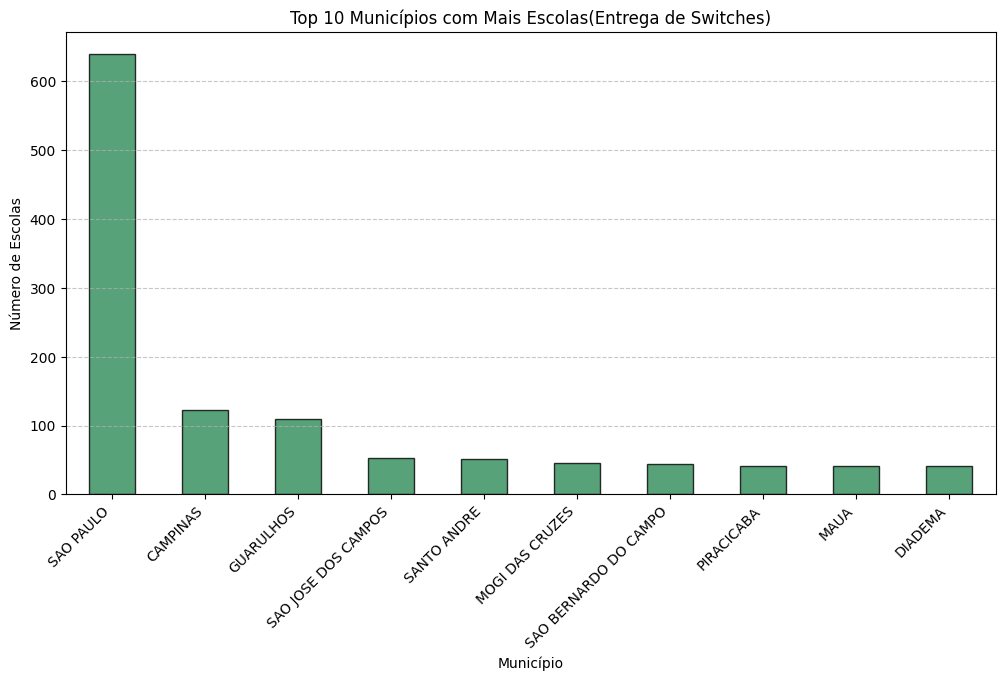

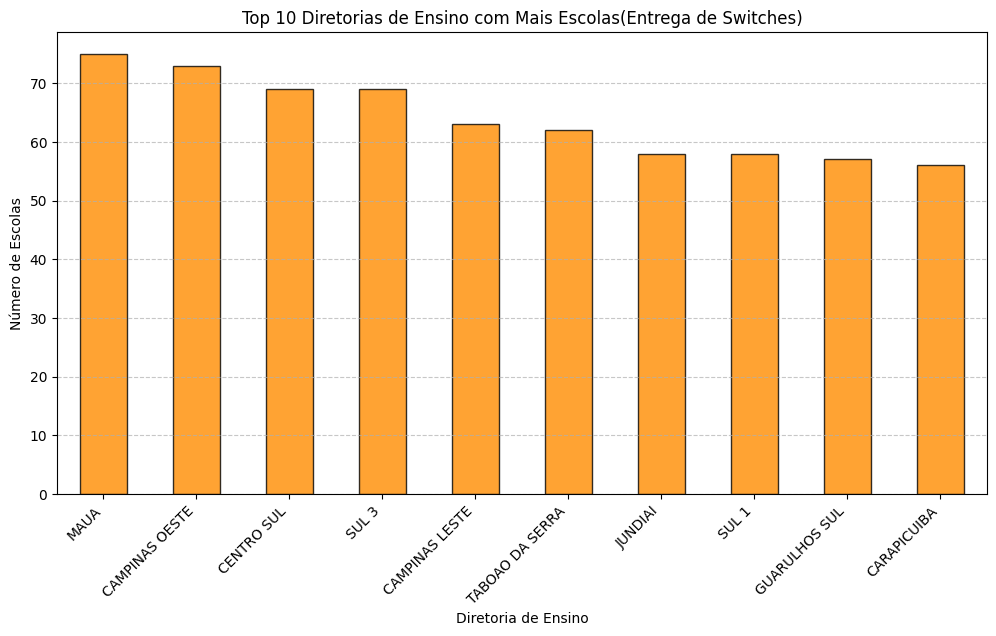

In [16]:


# 📂 Passo 1: Carregar o arquivo Excel
file_path = "dados_limpos.xlsx"  # Altere para o caminho correto do arquivo
df = pd.read_excel(file_path, engine="openpyxl")

# 🔢 Passo 4: Top 10 Diretorias de Ensino com mais escolas
diretoria_counts = df["DIRETORIA DE ENSINO"].value_counts()

# 🏙 Passo 5: Top 10 Municípios com mais escolas
municipio_counts = df["MUNICÍPIO"].value_counts()

# 🔢 Somar os switches por município
municipio_switches = df.groupby("MUNICÍPIO")["Total"].sum().sort_values(ascending=False)
# 🎯 Selecionar os 10 principais municípios
top_municipios = municipio_switches.head(10)


# 🌍 Gráfico de Barras - Top 10 Municípios com Mais Escolas
plt.figure(figsize=(12, 6))
municipio_counts.head(10).plot(kind="bar", color="seagreen", edgecolor="black", alpha=0.8)
plt.xlabel("Município")
plt.ylabel("Número de Escolas")
plt.title("Top 10 Municípios com Mais Escolas(Entrega de Switches)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 🏫 Gráfico de Barras - Top 10 Diretorias de Ensino com Mais Escolas
plt.figure(figsize=(12, 6))
diretoria_counts.head(10).plot(kind="bar", color="darkorange", edgecolor="black", alpha=0.8)
plt.xlabel("Diretoria de Ensino")
plt.ylabel("Número de Escolas")
plt.title("Top 10 Diretorias de Ensino com Mais Escolas(Entrega de Switches)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()






/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


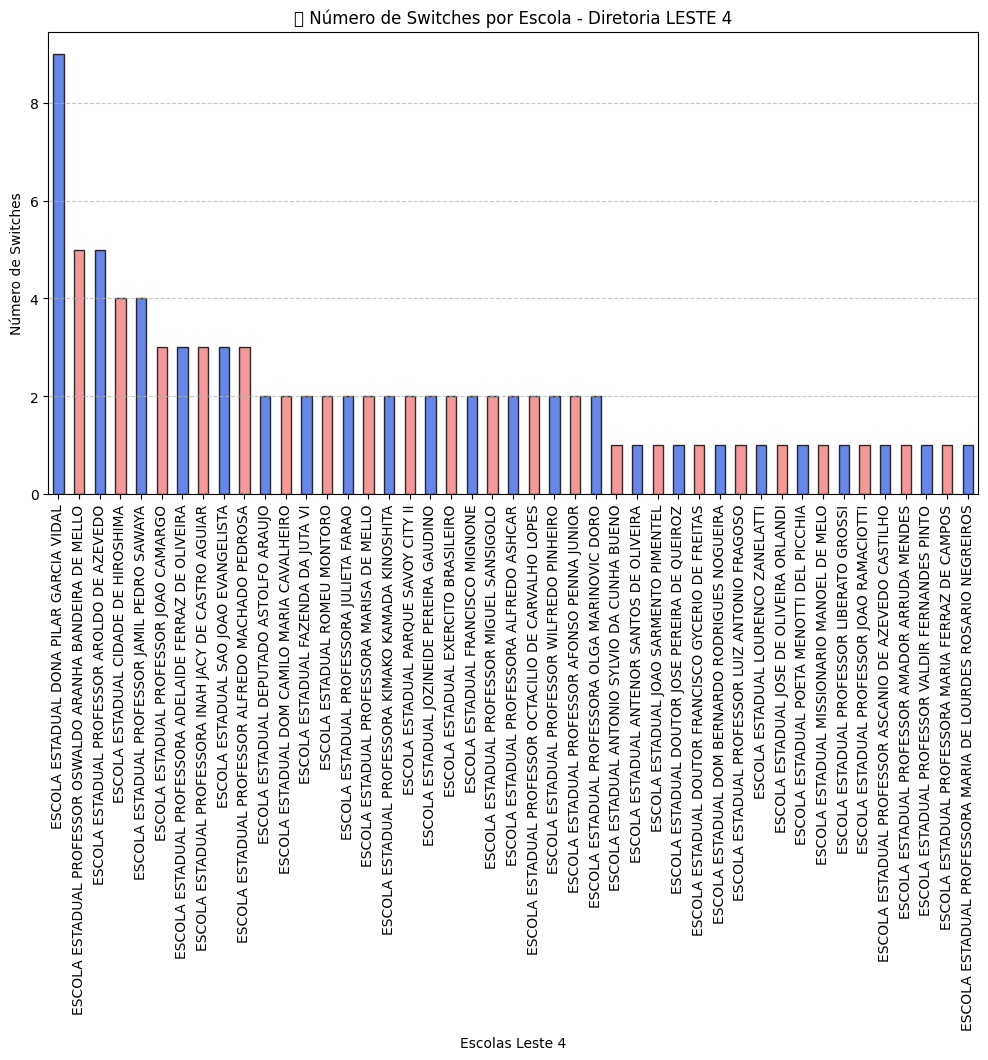

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 📂 Carregar a planilha
file_path = "dados_limpos.xlsx"  # Caminho correto do arquivo enviado
df = pd.read_excel(file_path, engine="openpyxl")

# 🎯 Filtrar apenas as escolas da Diretoria de Ensino "LESTE 4"
df_leste4 = df[df["DIRETORIA DE ENSINO"] == "LESTE 4"]

# 🔢 Agrupar por escola e somar o número de switches
escolas_switches = df_leste4.groupby("ESCOLAS")["Total"].sum().sort_values(ascending=False)

# 🎨 Criar o gráfico de barras com cores alternadas
plt.figure(figsize=(12, 6))

# Alternando entre 'royalblue' e 'lightcoral' para as barras
colors = ['royalblue' if i % 2 == 0 else 'lightcoral' for i in range(len(escolas_switches))]

# Criar o gráfico de barras
escolas_switches.plot(kind="bar", color=colors, edgecolor="black", alpha=0.8)

# Adicionar título e rótulos aos eixos
plt.xlabel("Escolas Leste 4")
plt.ylabel("Número de Switches")
plt.title("📊 Número de Switches por Escola - Diretoria LESTE 4")

# Ajustar rotação das etiquetas do eixo x
plt.xticks(rotation=90)  # Rotacionar nomes das escolas para melhor visualização

# Adicionar a grade no eixo Y
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 📌 Exibir o gráfico
plt.show()


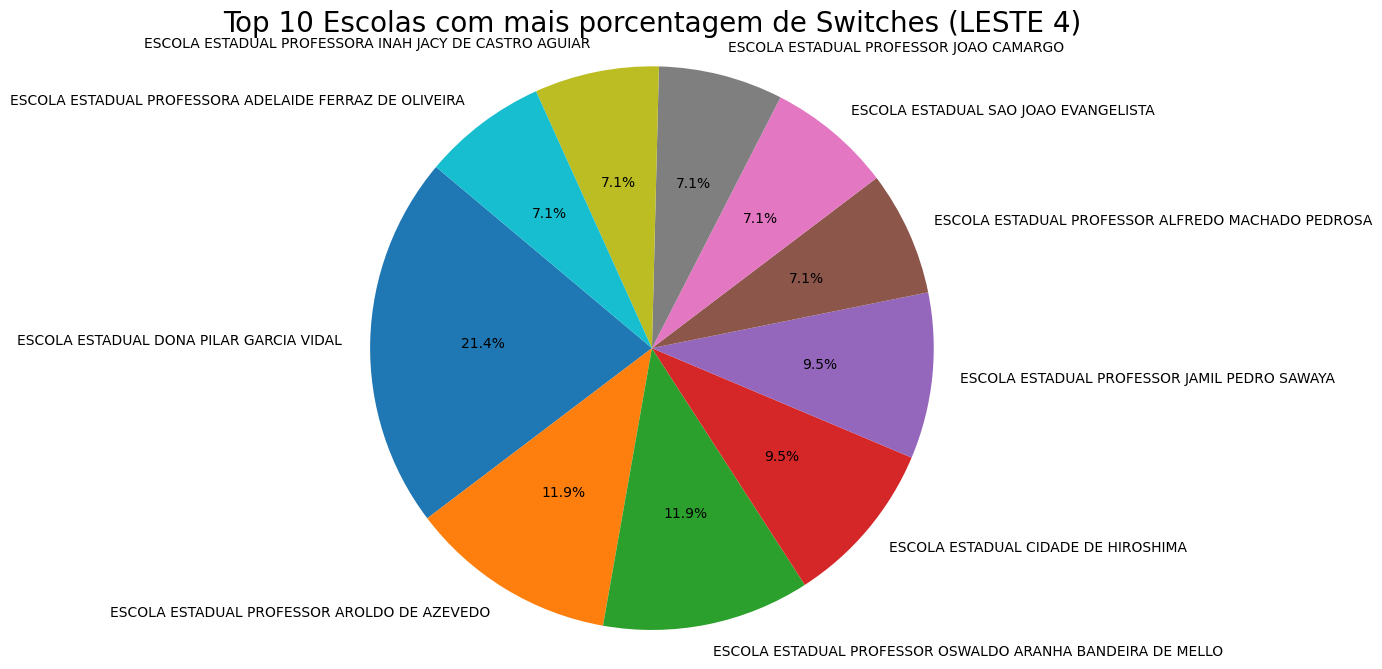

In [20]:
# Filtra as linhas onde a coluna 'DIRETORIA DE ENSINO' é 'LESTE 4'
escolas_leste4 = df[df['DIRETORIA DE ENSINO'] == 'LESTE 4']

# Ordena as escolas pela quantidade de switches (coluna 'Total') em ordem decrescente
top_10_escolas = escolas_leste4.sort_values(by='Total', ascending=False).head(10)

# Cria o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(top_10_escolas['Total'], labels=top_10_escolas['ESCOLAS'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Escolas com mais porcentagem de Switches (LESTE 4)', size=20)
plt.axis('equal')  # Para garantir que o gráfico seja circular
plt.show()